In [1]:
import torch
import cv2
import numpy as np
from tqdm import tqdm
import glob
import os

import os, sys

sys.path.insert(0, os.pardir)

from src.constant import TRAIN_FRAGMENTS_PATH


def get_shape(fragment_path):
        mask_path = os.path.join(fragment_path, 'inklabels.png')
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        shape = (65, mask.shape[0], mask.shape[1])

        return shape


def make_image(fragment_path):
    shape = get_shape(fragment_path)
    image = np.zeros(shape=shape, dtype=np.uint8)
    slices_files = sorted(glob.glob(os.path.join(fragment_path, 'surface_volume/*.tif')))

    print(f'\nMake image from {fragment_path}')
    for i, slice_path in tqdm(enumerate(slices_files), total=len(slices_files)):
        image[i, ...] = cv2.imread(slice_path, cv2.IMREAD_GRAYSCALE)

    return image

num_fragment = '1'
fragment_path = os.path.join(TRAIN_FRAGMENTS_PATH, num_fragment)
numpy_array = make_image(fragment_path)


Make image from ../data/raw/train/1


100%|██████████| 65/65 [00:17<00:00,  3.75it/s]


## Enregistrement original

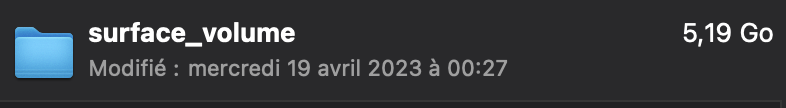

## Enregistrement Numpy 

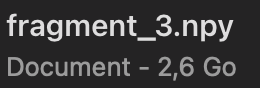

In [2]:
# display(numpy_array.nbytes / 1e+9)

# np.savez_compressed(f'../data/fragment_{num_fragment}', numpy_array)

## Enregistrement Pytorch

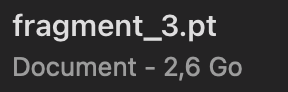

In [ ]:
size_fragment = 0

for fragment_id in ['1', '2', '3']:
    fragment_path = os.path.join(TRAIN_FRAGMENTS_PATH, fragment_id)
    numpy_array = make_image(fragment_path)
    np.savez_compressed(f'../data/fragment_{fragment_id}', numpy_array)
    # torch_tensor = torch.tensor(numpy_array).to(dtype=torch.uint8)
    # display(torch_tensor.nelement() * torch_tensor.element_size())
    # size_fragment += torch_tensor.nelement() * torch_tensor.element_size()
# torch.save(torch_tensor, f'../data/fragment_{num_fragment}.pt')


Make image from ../data/raw/train/1


100%|██████████| 65/65 [00:18<00:00,  3.42it/s]


In [ ]:
display(size_fragment / 1e+9)